### Enforcing Fairness in Fitzpatrick17K

This code demonstrates how to enforce fairness when working with deep neural networks in computer vision. Specifically we demonstrate how different notions of fairness and performance can be measured and enforced with our toolkit.

The protected attribute is Male. The user can specify what target attribute (e.g., Wearing_Earrings) that they would like to consider. 

In [1]:
!pip install git+https://github.com/ChrisMRuss/oxon-fair.git


  Cloning https://github.com/ChrisMRuss/oxon-fair.git to c:\users\sgoethals\appdata\local\temp\pip-req-build-yg8kzpl8
  Resolved https://github.com/ChrisMRuss/oxon-fair.git to commit 7098c670f9ad92d6f7b9fe794fbf257c2ef6f6f9


  Running command git clone -q https://github.com/ChrisMRuss/oxon-fair.git 'C:\Users\sgoethals\AppData\Local\Temp\pip-req-build-yg8kzpl8'


In [18]:
!pip show oxonfair

Name: oxonfair


Version: 0.1.5
Summary: AutoML Framework for evaluating and enforcing ML model fairness
Home-page: https://github.com/ChrisMRuss/oxon-fair/
Author: Governance of Emerging Technologies Programme (Oxford Internet Insitute)
Author-email: 
License: Apache-2.0
Location: c:\users\sgoethals\anaconda3\lib\site-packages
Requires: numpy, pandas
Required-by: 


In [19]:
import numpy as np 
import oxonfair
from oxonfair.utils import group_metrics as gm
from matplotlib import pyplot as plt

In [2]:
fitz_outputs_val = np.load('60_20_20_1_balanced_outputs_val_fitz17k.npy')
fitz_outputs_test = np.load('60_20_20_1_balanced_outputs_test_fitz17k.npy')
fitz_target_labels_val = np.load('60_20_20_1_fitz17k_target_labels_val.npy')
fitz_protected_labels_val = np.load('60_20_20_1_fitz17k_protected_labels_val.npy')
fitz_target_labels_test = np.load('60_20_20_1_fitz17k_target_labels_test.npy')
fitz_protected_labels_test = np.load('60_20_20_1_fitz17k_protected_labels_test.npy')

In [3]:
np.load('60_20_20_1_balanced_outputs_val_fitz17k.npy')

array([[ 0.79199237,  0.37575418],
       [-2.51230526,  0.70082897],
       [-4.45861387,  0.61371773],
       ...,
       [ 1.30813837,  0.23435649],
       [-2.95502949,  0.38634309],
       [-3.13313341,  0.14978038]])

In [4]:
# Load the numpy file

output_val = np.load('60_20_20_1_balanced_outputs_val_fitz17k.npy')
output_test = np.load('60_20_20_1_balanced_outputs_test_fitz17k.npy')
# Print the first items
#plt.hist((output[:,target_attribute_index]), bins=100)

def sigmoid(logits):
    return 1 / (1 + np.exp(-logits))

target_attribute_index=1
prediction_scores = sigmoid(output_val[:, target_attribute_index])
print(prediction_scores)
prediction_scores = sigmoid(output_val[:, 0])
print(prediction_scores)


[0.59284866 0.66837154 0.6487884  ... 0.55832243 0.59540206 0.53737525]
[0.68825897 0.07500003 0.01144588 ... 0.78720147 0.04949934 0.04176104]


In [5]:

# target attribute index = 34 - wear earringsi
import numpy as np
import pandas as pd

# Load the numpy file
output_val = np.load('60_20_20_1_balanced_outputs_val_fitz17k.npy')
output_test = np.load('60_20_20_1_balanced_outputs_test_fitz17k.npy')
# Print the first items
#plt.hist((output[:,target_attribute_index]), bins=100)

def sigmoid(logits):
    return 1 / (1 + np.exp(-logits))


target_attribute_index=0 
prediction_scores = sigmoid(output_val[:, target_attribute_index])
print(prediction_scores)



val_results, test_results=pd.DataFrame(), pd.DataFrame()
val_results['protected']=np.load('60_20_20_1_fitz17k_protected_labels_val.npy')
val_results['target']=np.load('60_20_20_1_fitz17k_target_labels_val.npy')
val_results['biased_scores']=prediction_scores
val_results['biased_label']=(prediction_scores>0.5).astype(int)
test_results['protected']=np.load('60_20_20_1_fitz17k_protected_labels_test.npy')
test_results['target']=np.load('60_20_20_1_fitz17k_target_labels_test.npy')
test_results['biased_scores']=sigmoid(output_test[:, target_attribute_index])
test_results['biased_label']=(sigmoid(output_test[:, target_attribute_index])>0.5).astype(int)

[0.68825897 0.07500003 0.01144588 ... 0.78720147 0.04949934 0.04176104]


### Enforcing Fairness

In [6]:
good_outcome=1
#base rate
print(test_results.target.value_counts(normalize=True)[good_outcome])
print(test_results[test_results.protected==True].target.value_counts(normalize=True))
print(test_results[test_results.protected==False].target.value_counts(normalize=True))
print(test_results.protected.value_counts(normalize=True))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


0.13654870028186658
target
0.0    0.89064
1.0    0.10936
Name: proportion, dtype: float64
target
0.0    0.850781
1.0    0.149219
Name: proportion, dtype: float64
protected
0.0    0.682117
1.0    0.317883
Name: proportion, dtype: float64
The base rate disparity is 0.03985986148995553


In [7]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\functions_with_validation.py"

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[FairAdapt]'


In [8]:
test_metrics = run_all_vision(test_results, val_results, good_outcome)

Calculate demographic parity


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:53<00:00,  1.14s/it]


Calculate equality of opportunity


100%|██████████| 100/100 [32:18<00:00, 19.39s/it]


Calculate precision


100%|██████████| 100/100 [00:02<00:00, 47.97it/s]


Calculate recall


100%|██████████| 100/100 [00:01<00:00, 63.83it/s]


In [10]:
%run "C:\Users\sgoethals\Documents\Research\Project Oxford\unfairness_fairml\Unfair_ML\functions\visualisations.py"

In [14]:
test_metrics=test_metrics[1]

In [15]:
print(mean(test_metrics['eod_unfair']))
print(mean(test_metrics['dd_unfair']))

0.03341593901593901
0.09259256243582262


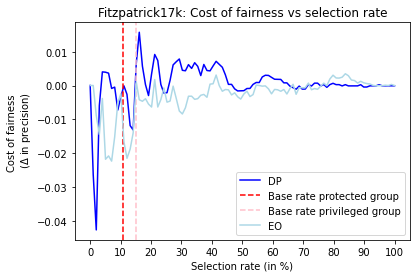

In [16]:
dataset='Fitzpatrick17k'
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]

plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')  

In [24]:
#save results
import pickle
with open('Results/fitzpatrick/test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open('Results/fitzpatrick/test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)


In [17]:
from sklearn.metrics import roc_auc_score
print('The AUC of the biased model (validation set) is:', roc_auc_score(val_results.target,val_results.biased_scores))
print('The AUC of the biased model (test set) is:', roc_auc_score(test_results.target,test_results.biased_scores))
print('The AUC of the biased model for the protected group (test set) is:', roc_auc_score(test_results[test_results.protected==True].target,test_results[test_results.protected==True].biased_scores))
print('The AUC of the biased model for the privileged group (test set) is:', roc_auc_score(test_results[test_results.protected==False].target,test_results[test_results.protected==False].biased_scores))
print('The base rate disparity is {}'.format(val_results[val_results.protected==False].target.value_counts(normalize=True)[good_outcome] - val_results[val_results.protected==True].target.value_counts(normalize=True)[good_outcome]))
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))

The AUC of the biased model (validation set) is: 0.843138037568955
The AUC of the biased model (test set) is: 0.8244501901748011
The AUC of the biased model for the protected group (test set) is: 0.8404687873714423
The AUC of the biased model for the privileged group (test set) is: 0.8138469841006268
The base rate disparity is 0.029566029110240588
The average cost of fairness (DP) is 0.000487971517233452
The average cost of fairness (EO) is -0.002944718423794713


### Fitzpatrick-17k Example

In [21]:
fitz_outputs_val = np.load('60_20_20_1_balanced_outputs_val_fitz17k.npy')
fitz_outputs_test = np.load('60_20_20_1_balanced_outputs_test_fitz17k.npy')
fitz_target_labels_val = np.load('60_20_20_1_fitz17k_target_labels_val.npy')
fitz_protected_labels_val = np.load('60_20_20_1_fitz17k_protected_labels_val.npy')
fitz_target_labels_test = np.load('60_20_20_1_fitz17k_target_labels_test.npy')
fitz_protected_labels_test = np.load('60_20_20_1_fitz17k_protected_labels_test.npy')